Exercicio 1 - Caso 1D simples

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Calculando bandas para alpha = 0.0...
Calculando bandas para alpha = 0.5...
Calculando bandas para alpha = 2.0...


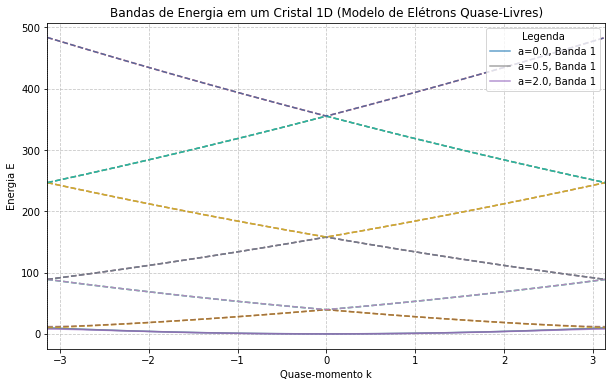

In [2]:
# 1. Função para Construir o Hamiltoniano (build_hamiltonian_with_diag) ---
def build_hamiltonian_with_diag(k_value, alpha, num_G_vectors):

    # Define os índices para os vetores G, centrados em G=0.
    # Ex: se num_G_vectors = 7, indices_G será [-3, -2, -1, 0, 1, 2, 3]
    indices_G = np.arange(-(num_G_vectors // 2), (num_G_vectors + 1) // 2)
    
    # Converte os índices em valores de G (G_n = 2*pi*n)
    G_vectors = 2 * np.pi * indices_G

    # Calcula os elementos da diagonal principal (termo de energia cinética: |k - G_n|^2)
    diagonal_main = (k_value - G_vectors)**2

    # Cria um array com os valores para as diagonais secundárias
    diagonal_alpha = np.full(num_G_vectors - 1, alpha)

    # Inicia a matriz Hamiltoniana com a diagonal principal preenchida.
    H = np.diag(diagonal_main)

    H += np.diag(diagonal_alpha, k=1)

    H += np.diag(diagonal_alpha, k=-1)

    return H

# 2. Função para Calcular as Bandas de Energia (calculate_bands) ---
def calculate_bands(alpha, num_G_vectors, k_points):
    
    all_eigenvalues = []

    for k_val in k_points:
      
        H_matrix = build_hamiltonian_with_diag(k_val, alpha, num_G_vectors)
        # np.linalg.eigvalsh(H_matrix) calcula os autovalores de uma matriz Hermitiana
        eigenvalues = np.linalg.eigvalsh(H_matrix)
        
        # Ordena os autovalores (energias) do menor para o maior.
        all_eigenvalues.append(np.sort(eigenvalues))
        
   
    return np.array(all_eigenvalues)

# --- 3. Parâmetros para Simulação ---
k_points = np.linspace(-np.pi, np.pi, 200) # 200 pontos entre -pi e pi


# alpha = 0.0 simula elétrons livres (sem potencial periódico).
# alpha > 0.0 mostra o efeito do potencial, como a abertura de gaps.
alphas = [0.0, 0.5, 2.0]


num_G_vectors = 7 

# --- 4. Execução e Plotagem ---
plt.figure(figsize=(10, 6))

for alpha_val in alphas: 
    print(f"Calculando bandas para alpha = {alpha_val}...") 
    
    
    energies = calculate_bands(alpha_val, num_G_vectors, k_points)

    
    for i in range(num_G_vectors):
        plt.plot(k_points, energies[:, i], 
                 label=f'a={alpha_val}, Banda {i+1}' if i == 0 else "", 
                 linestyle='-' if i==0 else '--', 
                 alpha=0.7)

    plt.axvline(x=-np.pi, color='gray', linestyle=':', linewidth=0.8)
    plt.axvline(x=np.pi, color='gray', linestyle=':', linewidth=0.8)

plt.title('Bandas de Energia em um Cristal 1D (Modelo de Elétrons Quase-Livres)') #
plt.xlabel('Quase-momento k')
plt.ylabel('Energia E') 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.xlim(-np.pi, np.pi) 
plt.legend(loc='upper right', title="Legenda") 
plt.show() 

c:\Users\Giovanni\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


Matriz V_{m,n} (real):
[[-0.313 -0.298 -0.257 -0.201 -0.142 -0.091 -0.053]
 [-0.298 -0.313 -0.298 -0.257 -0.201 -0.142 -0.091]
 [-0.257 -0.298 -0.313 -0.298 -0.257 -0.201 -0.142]
 [-0.201 -0.257 -0.298 -0.313 -0.298 -0.257 -0.201]
 [-0.142 -0.201 -0.257 -0.298 -0.313 -0.298 -0.257]
 [-0.091 -0.142 -0.201 -0.257 -0.298 -0.313 -0.298]
 [-0.053 -0.091 -0.142 -0.201 -0.257 -0.298 -0.313]]


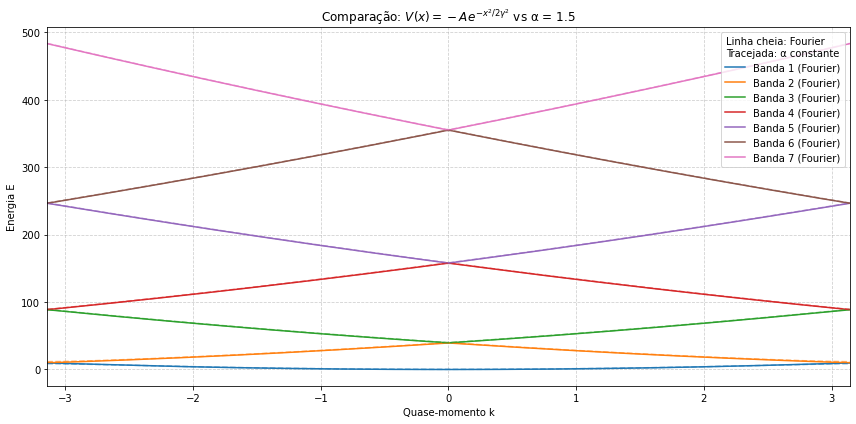

In [5]:
from scipy.integrate import quad

# --- 1. Potencial Gaussiano centrado em x = 0 ---
def V_gauss(x, A=1.0, gamma=0.05):
    return -A * np.exp(-x**2 / (2 * gamma**2))

# --- 2. Construção da matriz V_{m,n} ---
def build_V_matrix_gauss(func_V, num_G_vectors, A=1.0, gamma=0.05):
    indices = np.arange(-(num_G_vectors // 2), (num_G_vectors + 1) // 2)
    V_matrix = np.zeros((num_G_vectors, num_G_vectors), dtype=complex)
    for m in range(num_G_vectors):
        for n in range(num_G_vectors):
            delta = indices[m] - indices[n]
            integrand = lambda x: func_V(x, A, gamma) * np.exp(-1j * 2 * np.pi * delta * x)
            V_matrix[m, n], _ = quad(integrand, 0, 1)
    return V_matrix

# --- 3. Hamiltoniano com matriz V_{m,n} ---
def build_hamiltonian_from_V(k_value, V_matrix, num_G_vectors):
    indices_G = np.arange(-(num_G_vectors // 2), (num_G_vectors + 1) // 2)
    G_vectors = 2 * np.pi * indices_G
    kinetic = np.diag((k_value - G_vectors)**2)
    H = kinetic + V_matrix
    return H

def calculate_bands_with_V(V_matrix, num_G_vectors, k_points):
    all_eigenvalues = []
    for k_val in k_points:
        H = build_hamiltonian_from_V(k_val, V_matrix, num_G_vectors)
        eigenvalues = np.linalg.eigvalsh(H)
        all_eigenvalues.append(np.sort(eigenvalues))
    return np.array(all_eigenvalues)

# --- 4. Modelo com alpha nas secundárias (quase-livres) ---
def build_hamiltonian_with_diag(k_value, alpha, num_G_vectors):
    indices_G = np.arange(-(num_G_vectors // 2), (num_G_vectors + 1) // 2)
    G_vectors = 2 * np.pi * indices_G
    diagonal_main = (k_value - G_vectors)**2
    diagonal_alpha = np.full(num_G_vectors - 1, alpha)
    H = np.diag(diagonal_main)
    H += np.diag(diagonal_alpha, k=1)
    H += np.diag(diagonal_alpha, k=-1)
    return H

def calculate_bands(alpha, num_G_vectors, k_points):
    all_eigenvalues = []
    for k_val in k_points:
        H = build_hamiltonian_with_diag(k_val, alpha, num_G_vectors)
        eigenvalues = np.linalg.eigvalsh(H)
        all_eigenvalues.append(np.sort(eigenvalues))
    return np.array(all_eigenvalues)

# --- 5. Parâmetros ---
num_G_vectors = 7
k_points = np.linspace(-np.pi, np.pi, 200)

# Parâmetros do potencial gaussiano
A = 5.0
gamma = 0.05

# --- 6. Construir matriz V_{m,n} ---
V_matrix = build_V_matrix_gauss(V_gauss, num_G_vectors, A, gamma)
print("Matriz V_{m,n} (real):")
print(np.round(V_matrix.real, 3))

# --- 7. Calcular bandas para o potencial V(x) gaussiano ---
bands_from_V = calculate_bands_with_V(V_matrix, num_G_vectors, k_points)

# --- 8. Calcular bandas para modelo com alpha ---
alpha_equivalente = 1.5  # Você pode ajustar para tentar parecer com o efeito do V(x)
bands_from_alpha = calculate_bands(alpha_equivalente, num_G_vectors, k_points)

# --- 9. Plotar comparação ---
plt.figure(figsize=(12, 6))

# Bandas com V(x) (potencial real)
for i in range(num_G_vectors):
    plt.plot(k_points, bands_from_V[:, i], label=f'Banda {i+1} (Fourier)', color=f'C{i}', linestyle='-')

# Bandas com alpha
for i in range(num_G_vectors):
    plt.plot(k_points, bands_from_alpha[:, i], color=f'C{i}', linestyle='--', alpha=0.6)

plt.title(f'Comparação: $V(x) = -A e^{{-x^2 / 2\gamma^2}}$ vs α = {alpha_equivalente}')
plt.xlabel('Quase-momento k')
plt.ylabel('Energia E')
plt.legend(loc='upper right', title="Linha cheia: Fourier\nTracejada: α constante")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-np.pi, np.pi)
plt.tight_layout()
plt.show()


In [6]:
print("Matriz V_{m,n} do potencial:")
print(np.round(V_matrix.real, 3))

print("Matriz com alpha = 1.5:")
alpha_matrix = np.diag(np.full(num_G_vectors - 1, 1.5), k=1) + \
               np.diag(np.full(num_G_vectors - 1, 1.5), k=-1)
print(np.round(alpha_matrix, 3))


Matriz V_{m,n} do potencial:
[[-0.313 -0.298 -0.257 -0.201 -0.142 -0.091 -0.053]
 [-0.298 -0.313 -0.298 -0.257 -0.201 -0.142 -0.091]
 [-0.257 -0.298 -0.313 -0.298 -0.257 -0.201 -0.142]
 [-0.201 -0.257 -0.298 -0.313 -0.298 -0.257 -0.201]
 [-0.142 -0.201 -0.257 -0.298 -0.313 -0.298 -0.257]
 [-0.091 -0.142 -0.201 -0.257 -0.298 -0.313 -0.298]
 [-0.053 -0.091 -0.142 -0.201 -0.257 -0.298 -0.313]]
Matriz com alpha = 1.5:
[[0.  1.5 0.  0.  0.  0.  0. ]
 [1.5 0.  1.5 0.  0.  0.  0. ]
 [0.  1.5 0.  1.5 0.  0.  0. ]
 [0.  0.  1.5 0.  1.5 0.  0. ]
 [0.  0.  0.  1.5 0.  1.5 0. ]
 [0.  0.  0.  0.  1.5 0.  1.5]
 [0.  0.  0.  0.  0.  1.5 0. ]]
